Link al repositorio de Github: https://github.com/100461170/AA_practica_2_grupo_10

Para subir los archivos y demás a lo largo de los diferentes cuadernos hemos estado usando Drive ya que es muy rápido y cómodo, en vez de subir los archivos manualmente

Autores: Alejandro Díaz Cuéllar 100472173 y Tomás Mendizábal 100461170

# **Obtener los datos**

In [25]:
from google.colab import files
import pandas as pd
import numpy as np

# Si quieres subir el archivo stars.csv desde tu ordenador
#uploaded = files.upload()

# Montar el drive para incluir el archivo desde ahí
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Declaramos una semilla para reproducir los resultados, que será un NIA
seed = 100472173
# Leer el archivo CSV utilizando Pandas
df = pd.read_csv("/content/drive/MyDrive/AA_P2_Grupo10/stars_data.csv")

# **1.- Programar nuestro propio KMeans**

## 1.1.- Implementación

In [27]:
# Aunque la implementación de KMeans se corresponde con una clase de Python,
# como el enunciado dice que nuestro kmeans se implementase como una función
# hemos hecho una función que devolverá las labels y los centroides

def my_kmeans(data, n_clusters, good_init=False):
  # Si el good_init está activado, haremos 10 iteraciones
  if good_init:
      iterations = 10
  else:
      iterations = 1

  # Para almacenar las labels, inertias y centroides de cada iteración
  inertias = []
  results = []
  centroids_list = []

  for i in range(iterations):
      converger = False
      # Cogemos los centroides iniciales seleccionando aleatoriamente n_clusters instancias de los datos
      centroids = data[np.random.choice(data.shape[0], n_clusters, replace=False)]

      while not converger:
          # Calculamos la distancia euclidea de cada elemento del dataset a cada centroide
          distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
          # La label de cada centroide será el centroide del que estén más cerca
          labels = np.argmin(distances, axis=1)
          # Calculamos los nuevos centroides cogiendo la media de los elementos asignados a cada label
          new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(n_clusters)])
          # Miramos si ha convergido
          if np.allclose(centroids, new_centroids):
              converger = True
          centroids = new_centroids
      # Añadimos a resultados las labels obtenidas
      results.append(labels)

      # Calculamos la inercia y la añadimos a inertias
      inertia = 0
      for k in range(len(centroids)):
          inertia += np.sum((data[labels == k] - centroids[k])**2)
      inertias.append(inertia)

      # Almacenamos los centroides de esta iteración
      centroids_list.append(centroids)

  # Seleccionamos los resultados y centroides de la iteración con la menor inercia
  winner = inertias.index(min(inertias))
  return results[winner], centroids_list[winner]

## 1.2.- Pruebas

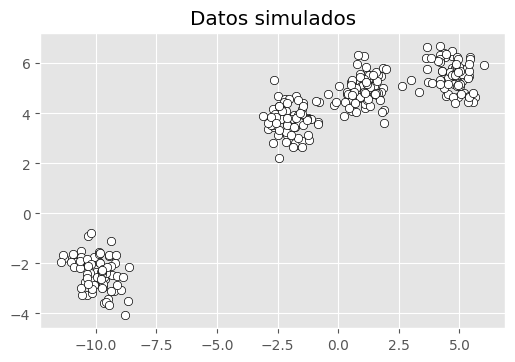

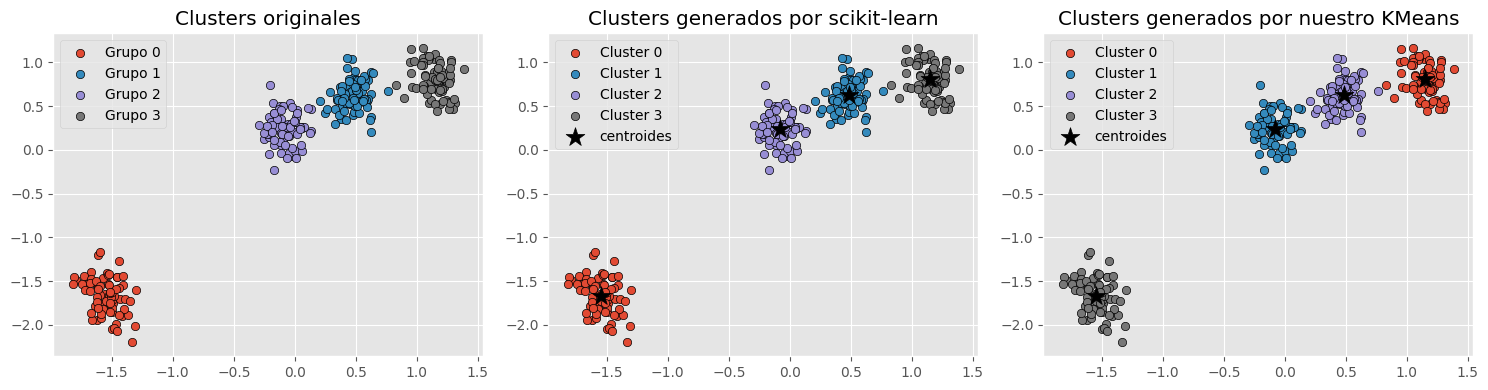

Silhouette Score de nuestro KMeans: 0.6869234091100377
Tiempo de nuestro KMeans 0.015336036682128906

Silhouette Score de scikit-learn: 0.6869234091100377
Tiempo de scikit-learn 0.013925313949584961


In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, completeness_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import time

# Creamos un mini dataset de prueba pensado para probar algoritmos de clustering
X, y = make_blobs(
    n_samples    = 300,
    n_features   = 2,
    centers      = 4,
    cluster_std  = 0.60,
    shuffle      = True,
    random_state = seed
)

# Dibujamos los datos simulados
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black',
)
ax.set_title('Datos simulados');

# Escalamos los datos
X_scaled = scale(X)

# Llamamos a nuestro KMeans
start_time = time.time()
labels_custom, centroids_custom = my_kmeans(X_scaled, 4, True)
end_time = time.time()
elapsed_time_kmeans = end_time - start_time

# Llamamos al KMeans de scikit-learn
start_time = time.time()
sklearn_kmeans = KMeans(n_clusters=4, random_state=seed)
sklearn_kmeans.fit(X=X_scaled)
labels_sklearn = sklearn_kmeans.predict(X_scaled)
end_time = time.time()
elapsed_time_scikit = end_time - start_time

# Frame para dibujar los 3 resultados
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
# Dibujamos los clusters originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax[0].set_title('Clusters originales')
ax[0].legend();

# Dibujamos los clusters generados por scikit-learn
for i in np.unique(labels_sklearn):
    ax[1].scatter(
        x = X_scaled[labels_sklearn == i, 0],
        y = X_scaled[labels_sklearn == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )
ax[1].scatter(
    x = sklearn_kmeans.cluster_centers_[:, 0],
    y = sklearn_kmeans.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por scikit-learn')
ax[1].legend();

# Dibujamos los clusters generados por nuestro KMeans
for i in np.unique(labels_custom):
    ax[2].scatter(
        x = X_scaled[labels_custom == i, 0],
        y = X_scaled[labels_custom == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[2].scatter(
    x = centroids_custom[:, 0],
    y = centroids_custom[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[2].set_title('Clusters generados por nuestro KMeans')
ax[2].legend();

plt.tight_layout()
plt.show()


# Calculamos la silhouette score
silhouette_custom = silhouette_score(X_scaled, labels_custom)
silhouette_sklearn = silhouette_score(X_scaled, labels_sklearn)

# Imprimimos las métricas
print("Silhouette Score de nuestro KMeans:", silhouette_custom)
print("Tiempo de nuestro KMeans", elapsed_time_kmeans)
print()
print("Silhouette Score de scikit-learn:", silhouette_sklearn)
print("Tiempo de scikit-learn", elapsed_time_scikit)

Como vemos, los resultados en este caso con los dos KMeans son absolutamente idénticos, si bien es cierto que, sorprendentemente, nuestro KMeans es más rápido. Como necesitamos que los resultados sean reproducibles y tampoco queremos emborronar este apartado con gráficas de un montón de ejemplos solo vamos a dejar este ejemplo gráfico.

 **NO OBSTANTE**, queremos anotar que no son siempre idénticos, y que hemos visto casos donde los grupos generados por make_blobs están muy juntos unos de otros donde nuestra implementación de KMeans no es capaz de generar bien los clusters, y empeora respecto a la implementación de Scikit-learn. También, si no usamos good_init hay una mayor probabilidad de que para este mismo ejemplo los clusters sean distintos y no los correctos. Esto ocurre debido a que al realizar una iteración solamente sin el good_init, la inicializacion de los centroides puede llevar a un máximo local

# **2.- Uso de 2 algoritmos de Clustering**

## 2.1.- Transformación de los datos

Primero vamos a transformar los colores del dataset para que sean más uniformes

In [29]:
# Establecemos una unificación de colores:
mapping = {
    'Red': ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['yellowish', 'Yellowish'],
    'White-Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}
# Mapeamos los datos
for target_color, source_colors in mapping.items():
  df.loc[df.Color.isin(source_colors), 'Color'] = target_color

Codificamos el dataframe de dos formas, con One Hot Encoding y con Ordinal Encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Seleccionamos las columnas con variables categóricas
categorical_cols = ['Spectral_Class', 'Color']

# ONE HOT ENCODING
encoder = OneHotEncoder(sparse=False, drop='first')
# Ajustamos y transformamos las variables categóricas
encoded_cols = encoder.fit_transform(df[categorical_cols])
# Convertimos la salida a un DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
# Por último concatenamos los DataFrames codificados con el DataFrame original
# donde dropeamos las columnas categóricas y las sustituimos por las nuevas
df_OH = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# ORDINAL ENCODING
df_OR = df.copy()
# Creamos un orden jerárquico para poder transformar las variables
colors = list(mapping.keys())
spectral = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
# Creamos el codificador
encoder = OrdinalEncoder(categories=[spectral, colors])
# Ajustamos y transformamos los datos
encoded_data = encoder.fit_transform(df_OR[categorical_cols])
# Reemplazamos las columnas categóricas originales con las codificadas
df_OR['Spectral_Class'] = encoded_data[:, 0]
df_OR['Color'] = encoded_data[:, 1]

# Para ver que se ha realizado correctamente
print(df_OH)
print(df_OR)

     Temperature              L          R    A_M  Spectral_Class_B  \
0           3068       0.002400     0.1700  16.12               0.0   
1           3042       0.000500     0.1542  16.60               0.0   
2           2600       0.000300     0.1020  18.70               0.0   
3           2800       0.000200     0.1600  16.65               0.0   
4           1939       0.000138     0.1030  20.06               0.0   
..           ...            ...        ...    ...               ...   
235        38940  374830.000000  1356.0000  -9.93               0.0   
236        30839  834042.000000  1194.0000 -10.63               0.0   
237         8829  537493.000000  1423.0000 -10.73               0.0   
238         9235  404940.000000  1112.0000 -11.23               0.0   
239        37882  294903.000000  1783.0000  -7.80               0.0   

     Spectral_Class_F  Spectral_Class_G  Spectral_Class_K  Spectral_Class_M  \
0                 0.0               0.0               0.0           

Ahora escalaremos los datos con StandardScaler y posteriormente extraeremos dos componentes PCA antes de pasar los datos a los algoritmos de clustering


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_OH_scaled = scaler.fit_transform(df_OH)
X_OR_scaled = scaler.fit_transform(df_OR)
pca = PCA(n_components=2)
X_OH_PCA = pca.fit_transform(X_OH_scaled)
X_OR_PCA = pca.fit_transform(X_OR_scaled)

## 2.2.- Algoritmo 1: KMeans

Lo primero que vamos a hacer es calcular el número óptimo de clusters a introducir en KMeans para cada uno de los distintas codificaciones

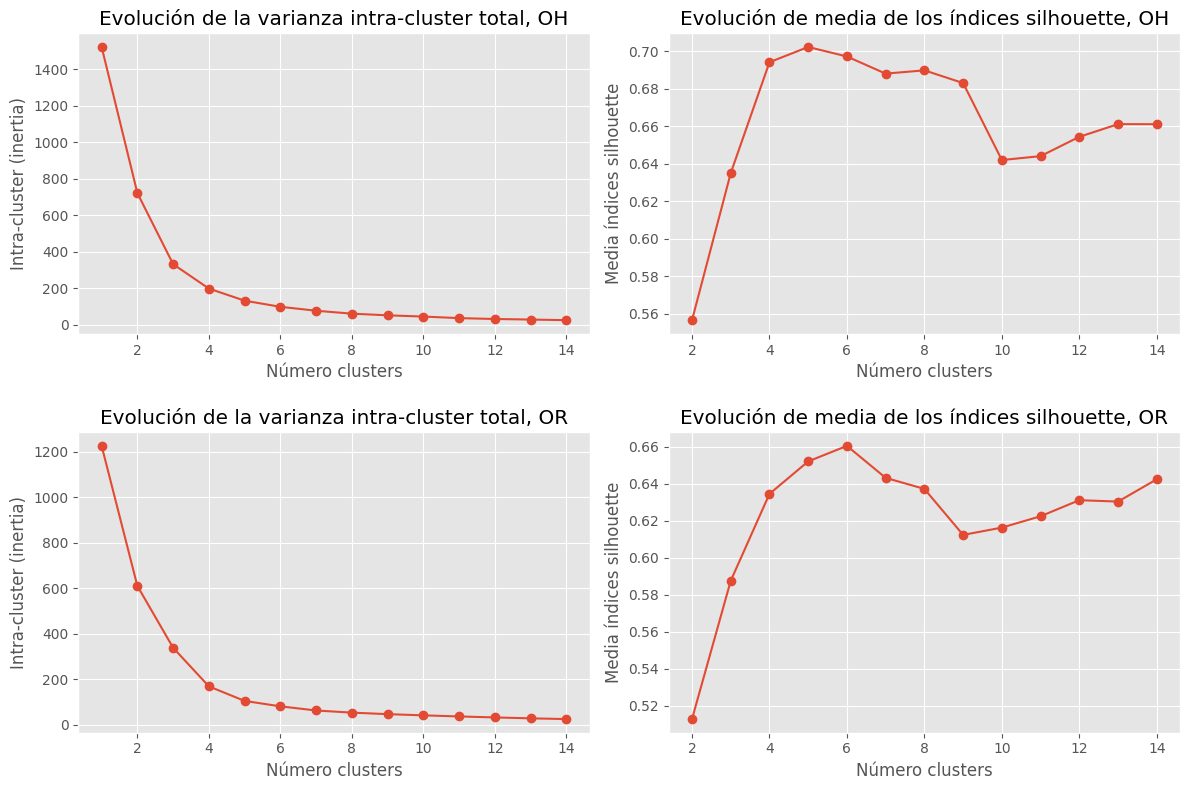

In [32]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)

# Para los datos con One Hot Encoding
inertias = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = seed
    )
    modelo_kmeans.fit(X_OH_PCA)
    inertias.append(modelo_kmeans.inertia_)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(range_n_clusters, inertias, marker='o')
axes[0, 0].set_title("Evolución de la varianza intra-cluster total, OH")
axes[0, 0].set_xlabel('Número clusters')
axes[0, 0].set_ylabel('Intra-cluster (inertia)');

# Para los datos con Ordinal Encoding
inertias = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = seed
    )
    modelo_kmeans.fit(X_OR_PCA)
    inertias.append(modelo_kmeans.inertia_)
axes[1, 0].plot(range_n_clusters, inertias, marker='o')
axes[1, 0].set_title("Evolución de la varianza intra-cluster total, OR")
axes[1, 0].set_xlabel('Número clusters')
axes[1, 0].set_ylabel('Intra-cluster (inertia)');

# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
# Para los datos con One Hot Encoding
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = seed
    )
    cluster_labels = modelo_kmeans.fit_predict(X_OH_PCA)
    silhouette_avg = silhouette_score(X_OH_PCA, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
axes[0, 1].plot(range_n_clusters, valores_medios_silhouette, marker='o')
axes[0, 1].set_title("Evolución de media de los índices silhouette, OH")
axes[0, 1].set_xlabel('Número clusters')
axes[0, 1].set_ylabel('Media índices silhouette');

# Para los datos con Ordinal Encoding
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = seed
    )
    cluster_labels = modelo_kmeans.fit_predict(X_OR_PCA)
    silhouette_avg = silhouette_score(X_OR_PCA, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
axes[1, 1].plot(range_n_clusters, valores_medios_silhouette, marker='o')
axes[1, 1].set_title("Evolución de media de los índices silhouette, OR")
axes[1, 1].set_xlabel('Número clusters')
axes[1, 1].set_ylabel('Media índices silhouette')

plt.tight_layout(h_pad=2.0)
plt.show()

Como vemos, en este caso el metodo elbow puede llegar a ser algo difuso y es mejor si nos guiamos por el silhouette score para elegir el número de clusters. Como vemos hay una ligera diferencia entre el dataset con One Hot Encoding y el Ordinal. El número óptimo de clusters para One Hot va a ser 5, mientras que para Ordinal será 6.

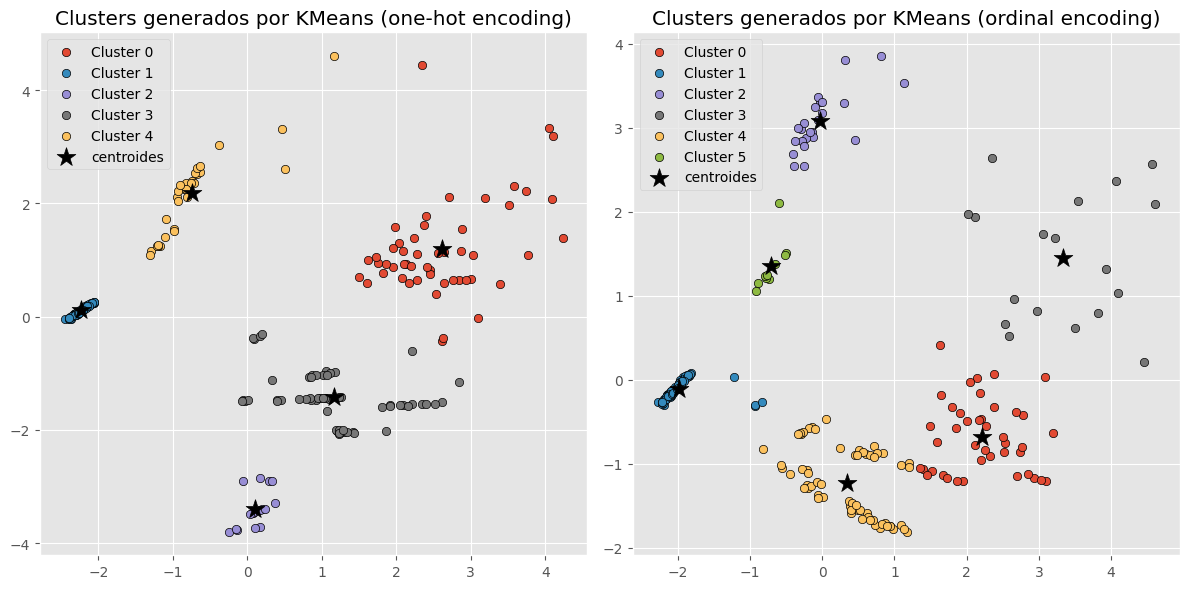

Inertia (One-Hot Encoding): 132.68572263524803
Silhouette Score (One-Hot Encoding): 0.7023144728430835
Inertia (Ordinal Encoding): 80.70203003813528
Silhouette Score (Ordinal Encoding): 0.6605298437727174


In [33]:
kmeans_oh = KMeans(n_clusters=5, random_state = seed)
kmeans_or = KMeans(n_clusters=6, random_state = seed)

# ONE HOT ENCODING
labels_OH_kmeans = kmeans_oh.fit_predict(X_OH_PCA)

# ORDINAL ENCODING
labels_OR_kmeans = kmeans_or.fit_predict(X_OR_PCA)

# Calculamos la inertia y la silhouettes score para One Hot
inertia_OH = kmeans_oh.inertia_
silhouette_score_OH = silhouette_score(X_OH_PCA, labels_OH_kmeans)

# Calculamos la inertia y la silhouettes score para Ordinal
inertia_OR = kmeans_or.inertia_
silhouette_score_OR = silhouette_score(X_OR_PCA, labels_OR_kmeans)

# Crea una marco para mostrar los resultados
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para One Hot
for i in np.unique(labels_OH_kmeans):
    ax[0].scatter(
        x = X_OH_PCA[labels_OH_kmeans == i, 0],
        y = X_OH_PCA[labels_OH_kmeans == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[0].scatter(
    x = kmeans_oh.cluster_centers_[:, 0],
    y = kmeans_oh.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[0].set_title('Clusters generados por KMeans (one-hot encoding)')
ax[0].legend()

# Gráfico para Ordinal
for i in np.unique(labels_OR_kmeans):
    ax[1].scatter(
        x = X_OR_PCA[labels_OR_kmeans == i, 0],
        y = X_OR_PCA[labels_OR_kmeans == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[1].scatter(
    x = kmeans_or.cluster_centers_[:, 0],
    y = kmeans_or.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por KMeans (ordinal encoding)')
ax[1].legend()

plt.tight_layout()
plt.show()

# Imprimimos también los resultados númericos
print("Inertia (One-Hot Encoding):", inertia_OH)
print("Silhouette Score (One-Hot Encoding):", silhouette_score_OH)
print("Inertia (Ordinal Encoding):", inertia_OR)
print("Silhouette Score (Ordinal Encoding):", silhouette_score_OR);

Como podemos observar, aunque la silhouette score del One Hot encoding es ligeramente superior, la inercia del Ordinal es bastante más baja. Por tanto concluimos que la mejor codificación será Ordinal Encoding

## 2.3.- Algoritmo 2: DBSCAN

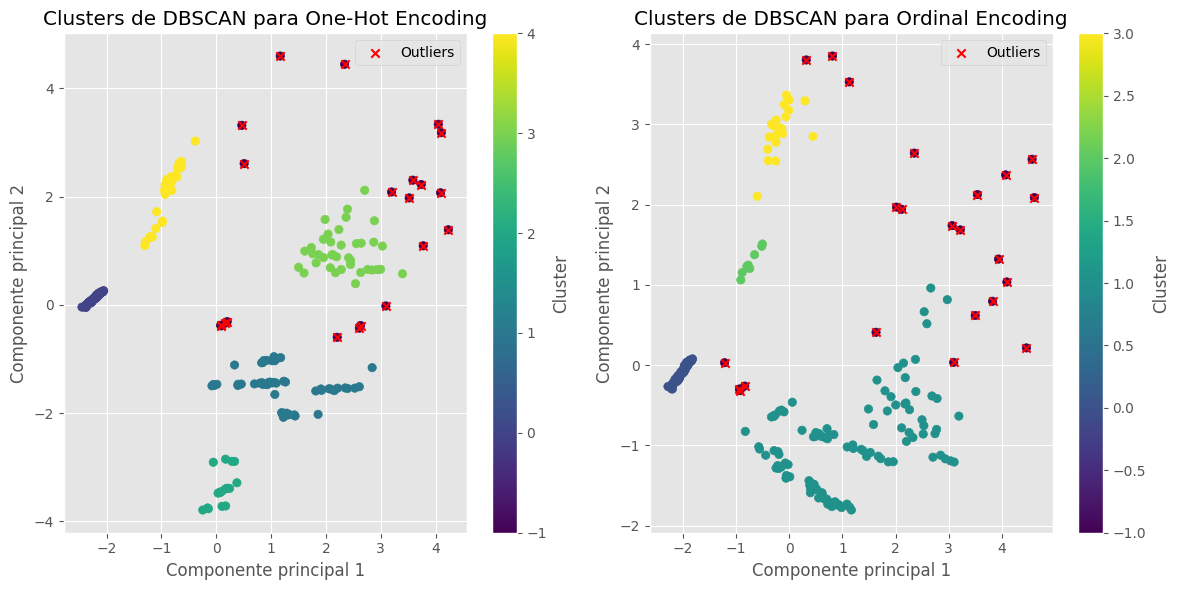

Número de clusters encontrados OH: 5
Número de outliers encontrados OH: 21
Silhouette score para One-Hot Encoding: 0.6594973149309752
Número de clusters encontrados OR: 4
Número de outliers encontrados OR: 23
Silhouette score para Ordinal Encoding: 0.5831053288710308


In [34]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Modelo OH
# ==============================================================================
modelo_dbscan_oh = DBSCAN(
    eps          = 0.5,
    min_samples  = 5,
    metric       = 'euclidean',
)

modelo_dbscan_oh.fit(X_OH_PCA)
labels_oh = modelo_dbscan_oh.labels_


# Modelo OR
# ==============================================================================
modelo_dbscan_or = DBSCAN(
    eps          = 0.5,
    min_samples  = 5,
    metric       = 'euclidean',
)

modelo_dbscan_or.fit(X_OR_PCA)
labels_or = modelo_dbscan_or.labels_

# Creamos una figura para los gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para OH
scatter_oh = axes[0].scatter(X_OH_PCA[:, 0], X_OH_PCA[:, 1], c=labels_oh, cmap='viridis', marker='o')
axes[0].set_title('Clusters de DBSCAN para One-Hot Encoding')
axes[0].set_xlabel('Componente principal 1')
axes[0].set_ylabel('Componente principal 2')
fig.colorbar(scatter_oh, ax=axes[0], label='Cluster')

# Resaltamos los outliers con una x roja
outliers_oh = X_OH_PCA[labels_oh == -1]
axes[0].scatter(outliers_oh[:, 0], outliers_oh[:, 1], color='red', marker='x', label='Outliers')
axes[0].legend()

# Gráfico para OR
scatter_or = axes[1].scatter(X_OR_PCA[:, 0], X_OR_PCA[:, 1], c=labels_or, cmap='viridis', marker='o')
axes[1].set_title('Clusters de DBSCAN para Ordinal Encoding')
axes[1].set_xlabel('Componente principal 1')
axes[1].set_ylabel('Componente principal 2')
fig.colorbar(scatter_or, ax=axes[1], label='Cluster')

# Resaltamos los outliers con una x roja
outliers_or = X_OR_PCA[labels_or == -1]
axes[1].scatter(outliers_or[:, 0], outliers_or[:, 1], color='red', marker='x', label='Outliers')
axes[1].legend()

plt.tight_layout()
plt.show()

# Calculamos algunas métricas númericas
# Número de clusters y observaciones "outliers" para OH
n_clusters_oh = len(set(labels_oh)) - (1 if -1 in labels_oh else 0)
n_noise_oh = list(labels_oh).count(-1)
# Silhouette score para OH
silhouette_score_oh = silhouette_score(X_OH_PCA, labels_oh)
print(f'Número de clusters encontrados OH: {n_clusters_oh}')
print(f'Número de outliers encontrados OH: {n_noise_oh}')
print(f'Silhouette score para One-Hot Encoding: {silhouette_score_oh}')

# Número de clusters y observaciones "outliers" para OR
n_clusters_or = len(set(labels_or)) - (1 if -1 in labels_or else 0)
n_noise_or = list(labels_or).count(-1)
# Silhouette score para OR
silhouette_score_or = silhouette_score(X_OR_PCA, labels_or)
print(f'Número de clusters encontrados OR: {n_clusters_or}')
print(f'Número de outliers encontrados OR: {n_noise_or}')
print(f'Silhouette score para Ordinal Encoding: {silhouette_score_or}')


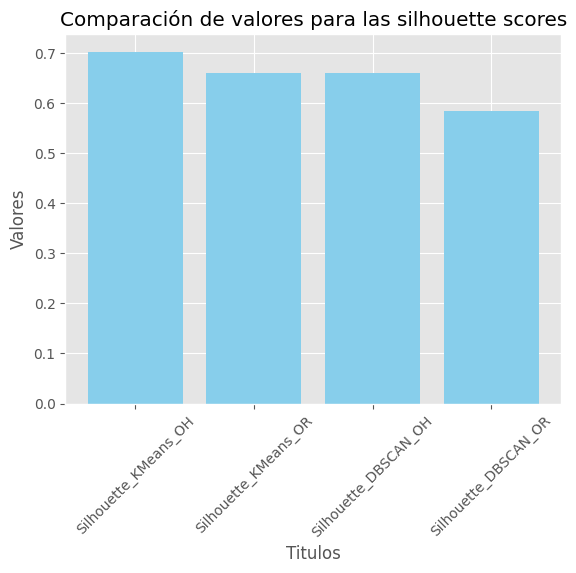

In [35]:
# Dibujamos un pequeño grafico
variables = ['Silhouette_KMeans_OH', 'Silhouette_KMeans_OR', 'Silhouette_DBSCAN_OH', 'Silhouette_DBSCAN_OR']

# Valores de las variables
valores = [silhouette_score_OH, silhouette_score_OR, silhouette_score_oh, silhouette_score_or]

# Crear el gráfico de barras
plt.bar(variables, valores, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Titulos')
plt.ylabel('Valores')
plt.title('Comparación de valores para las silhouette scores')
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

Como vemos, los resultados usando DBSCAN son algo peores que con KMeans. Esto tiene una explicación y es que la densidad de los clusters no es demasiado homógenea y hay datos dispersos en los datos con las PCA extraidas, lo que hace que DBSCAN no sea capaz de identificar los clusters correctamente.

Como elección final, vamos a quedarnos con el KMeans ordinal, puesto que aunque su silhouette score es lago más baja que la de One Hot, su inercia es bastante más baja,y además el número de clusters se acerca más a los indicados en el enunciado

# **3.- Pipeline recomendada**

Hemos podido comprobar que el mejor de los dos métodos es sin duda KMeans, así que la pipeline recomendada para sacar los mejores resultados posibles es la siguiente:
1.   Ordinal Encoding para las variables categóricas
2.   Standard Scaler para escalar los datos númericos
3.   Extracción de dos componentes PCA
4.   Uso de KMeans con n_clusters = 6

Para evaluar los resultados, se deberá realizar un análisis de la silhouette score y de la inertia del modelo obtenido, como hemos venido haciendo a lo largo de la práctica

# **4.- Comparación de resultados con los proporcionados en el enunciado**

Vamos a coger el modelo generado con el mejor pipeline y a compararlo con los datos del enunciado a ver si se parecen. Para ello aprovecharemos que los índices de la lista de labels se corresponden con los índices del dataset original y añadiremos las labels a un nuevo dataframe que sera una copia del original. A partir de ahi podremos agrupar los datos por cluster y sacar estadisticas

In [36]:
df_resultados = df.copy()
df_resultados['cluster'] = labels_OR_kmeans

# Agrupamos los datos por cluster y hacemos una agregacion de los datos
# para poder sacar las medias y para Color y Spectral_class el elemento más común
# y los tres más comunes respectivamente
cluster_means = df_resultados.groupby('cluster').agg({
    'Temperature': 'mean',
    'L': 'mean',
    'R': 'mean',
    'A_M': 'mean',
    'Color': lambda x: x.value_counts().index[0],
    'Spectral_Class': lambda x: x.value_counts().index[0:3]
})

# Aplicamos el mismo formato que está en la tabla del enunciado
formato_columnas = {'L': '{:.2e}', 'R': '{:.2e}', 'A_M': '{:.1f}', 'Temperature': '{:.0f}'}
cluster_means = cluster_means.style.format(formato_columnas)
cluster_means

,Temperature,L,R,A_M,Color,Spectral_Class
cluster,,,,,,
0,21793,2.03e+05,5.29e+01,-5.6,Blue,['O' 'B']
1,3214,1.75e-02,2.62e-01,14.6,Red,['M' 'K']
2,3782,2.46e+05,1.39e+03,-9.9,Red,['M' 'K' 'G']
3,24016,5.12e+05,1.11e+03,-8.7,Blue,['O' 'B' 'A']
4,12522,1.34e+02,1.25e+00,8.4,Blue-White,['B' 'A' 'F']
5,3467,2.07e+05,1.30e+02,-6.8,Red,M


Vamos primero a recordar como eran los grupos del enunciado:

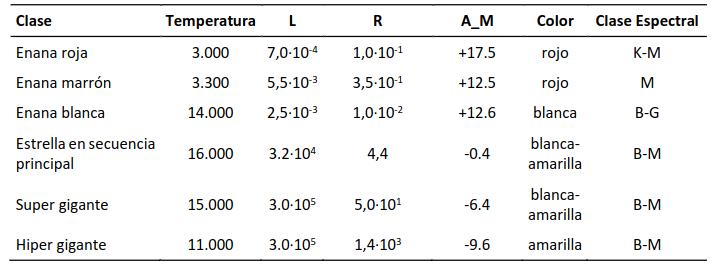




Como vemos, si bien algun grupo puede tener similitudes elevadas, como es el caso del cluster 1 con la clase "Enana marrón", por norma general no se parecen demasiado. Esto parece tener una explicación y es que en los datos  parece haber bastante presencia de estrellas con colores azulados, lo que se correspondería con temperaturas más elevadas y clases espectrales concretas que se encuentran en las estrellas con más energía, mientras que en las clases proporcionadas ni siquiera se contemplan estas características.


Es por ello que los clusters pueden variar al haber presencia de estrellas y características no contempladas en las clases del enunciado. Además, podría deberse también a que en los datos proporcionados haya pocas estrellas, y no se puedan sacar grupos tan bien como si tuvieramos muchas más.